<a href="https://colab.research.google.com/github/JHyunjun/SNU/blob/main/Team1_final_ensemble(CNN/VGG16/RestNet50).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Traffic Sign Recognizer - 99% accuracy*

## Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/snu/project/data

/content/drive/MyDrive/Colab Notebooks/snu/project/data


## unzip

In [5]:
'''
path_to_zip_file = '/content/drive/MyDrive/Colab Notebooks/snu/project/data.zip'
directory_to_extract_to = '/content/drive/MyDrive/Colab Notebooks/snu/project/data'

import zipfile
with zipfile.ZipFile(path_to_zip_file,'r') as zip_ref:
  zip_ref.extractall(directory_to_extract_to)
'''

"\npath_to_zip_file = '/content/drive/MyDrive/Colab Notebooks/snu/project/data.zip'\ndirectory_to_extract_to = '/content/drive/MyDrive/Colab Notebooks/snu/project/data'\n\nimport zipfile\nwith zipfile.ZipFile(path_to_zip_file,'r') as zip_ref:\n  zip_ref.extractall(directory_to_extract_to)\n"

## Assigning Path for Dataset

In [6]:
data_dir = './data'
data_dir_test = './data/'

train_path = './data/Train'
test_path = './data/Test'

# Resizing the images to 30x30x3
IMG_HEIGHT = 40
IMG_WIDTH = 40
channels = 3

## Finding Total Classes

In [7]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [8]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

## Visualizing The Dataset

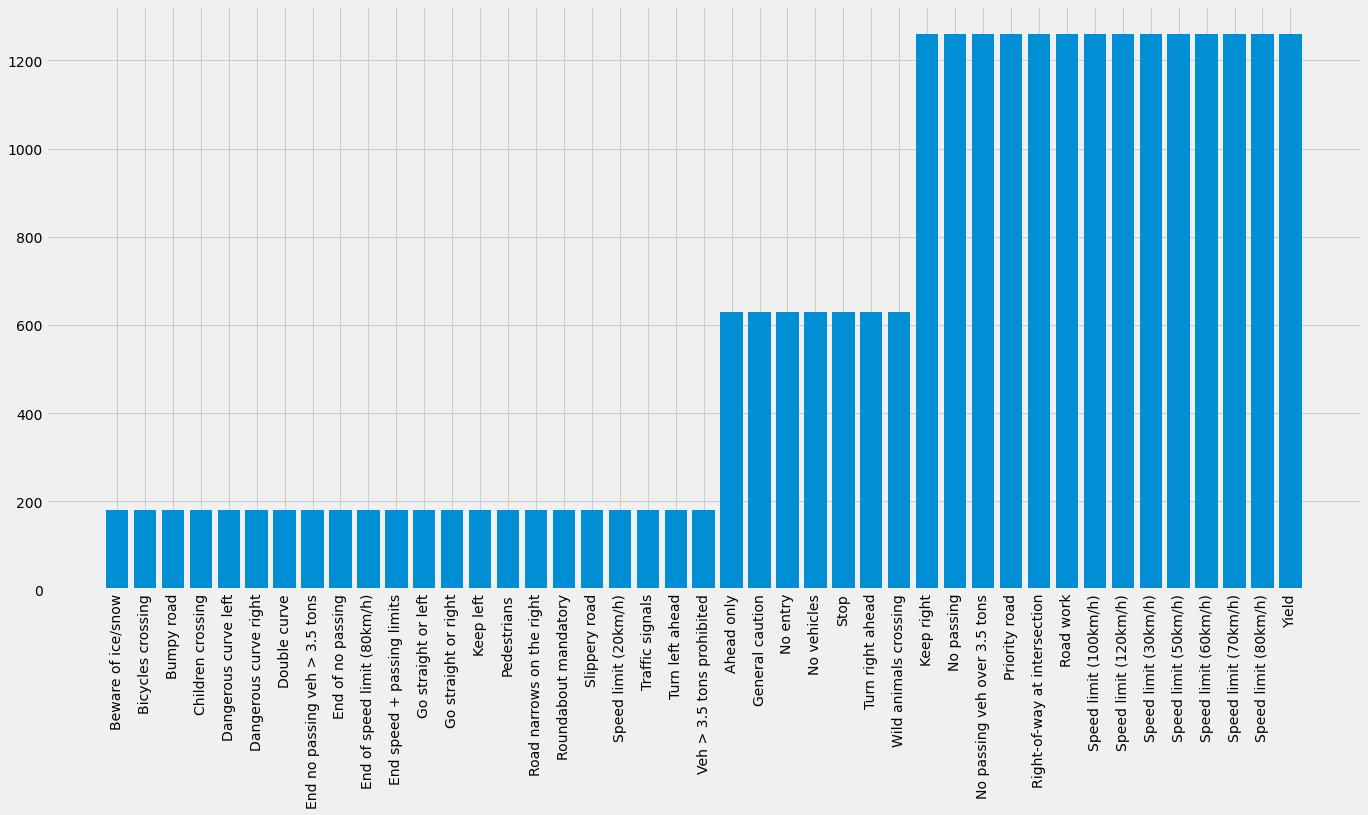

In [9]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

## Collecting the Training Data

In [10]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = train_path + '/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(26010, 40, 40, 3) (26010,)


## Shuffling the training data

In [11]:
'''
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]
'''

'\nshuffle_indexes = np.arange(image_data.shape[0])\nnp.random.shuffle(shuffle_indexes)\nimage_data = image_data[shuffle_indexes]\nimage_labels = image_labels[shuffle_indexes]\n'

## Splitting the data into train and validation set

In [12]:
'''
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)
'''

'\nX_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)\n\nX_train = X_train/255 \nX_val = X_val/255\n\nprint("X_train.shape", X_train.shape)\nprint("X_valid.shape", X_val.shape)\nprint("y_train.shape", y_train.shape)\nprint("y_valid.shape", y_val.shape)\n'

## SMOTE

In [13]:
from imblearn.over_sampling import SMOTE

data = image_data
labels = image_labels

def smote(data, labels): 
  
  X = data.reshape(len(data), -1)
  y = labels
  smt = SMOTE(sampling_strategy='not majority', k_neighbors=5, n_jobs=-1)
  X_smote, y_smote = smt.fit_resample(X, y)
  X_smote = X_smote.reshape((-1, )+ data.shape[1:]) 

  return  X_smote, y_smote

In [14]:
data, labels = smote(data, labels)

## One hot encoding the labels

In [15]:
labels = keras.utils.to_categorical(labels, NUM_CATEGORIES)

print(labels.shape)

(54180, 43)


## Augmenting the data and training the model

## Making the model

In [16]:
aug = ImageDataGenerator(
    rotation_range = 30,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

In [17]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from sklearn.ensemble import RandomForestClassifier, VotingClassifier #Random Forest

def build_model(dr):
  
    model = keras.models.Sequential([    
        keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
        keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2, 2)),
        keras.layers.BatchNormalization(axis=-1),
        
        keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
        keras.layers.MaxPool2D(pool_size=(2, 2)),
        keras.layers.BatchNormalization(axis=-1),
        
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(rate=dr),
        
        keras.layers.Dense(43, activation='softmax')
    ])
    model2 = keras.models.Sequential([    
        VGG16(input_shape=(IMG_HEIGHT, IMG_WIDTH, channels), include_top=False, weights='imagenet'),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(rate=dr),
        keras.layers.Dense(43, activation='softmax')
    ])

    model3= keras.models.Sequential([
        ResNet50V2(
           include_top=None,
           weights='imagenet',
           input_tensor=None,
           input_shape=None,
           pooling=None,
           classes=256,
           classifier_activation='softmax'),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(rate=dr),
        keras.layers.Dense(43, activation='softmax')
    ])

    return model3

## Result

In [18]:
def result_record(record):
    filename = './result/summary_3.csv'
    col = ['index','lr','dr','bs','stop_epoch','loss','metric']
    
    if os.path.exists(filename):
        summary = pd.read_csv(filename)
    else:
        summary = pd.DataFrame(columns=col)
    
    summary = summary.append(record, ignore_index=True)
    summary.to_csv(filename)

## metric

In [19]:
from keras import backend as K

def f1_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())

    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())

    return 2*((precision*recall)/(precision+recall+K.epsilon()))

## cross validation

In [20]:
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping

def cross_val(data, labels, ep, bs, dr, lr):
    kf = KFold(n_splits=5, shuffle = True)
    metric, loss = 0, 0

    for cr_idx, (tr_idx, val_idx) in enumerate(kf.split(data)):
        print('Cross validation: %d' %cr_idx)

        tr_data = data[tr_idx]
        tr_label = labels[tr_idx]

        val_data = data[val_idx]
        val_label = labels[val_idx]

        early_stopping = EarlyStopping(monitor='val_loss', patience=20)
        model1 = build_model(dr=dr)
        opt = Adam(learning_rate=lr, decay=lr / (ep * 0.5))
        model1.compile(loss='categorical_crossentropy', optimizer=opt,
                       metrics=['accuracy', f1_m])

        history = model1.fit(aug.flow(tr_data, tr_label, batch_size = bs), verbose=2, epochs=ep, batch_size=bs, 
                            validation_data=[val_data, val_label],
                            callbacks=[early_stopping])
        stop_epoch = early_stopping.stopped_epoch

        val_label_hat = model1.predict(val_data)
        # evaluate the model

        curr_loss, curr_acc, curr_metric = model1.evaluate(val_data, val_label, verbose=0)

        if cr_idx == 0:
            best_model1 = model1
            best_metric = curr_metric
        else:
            if best_metric < curr_metric:
                best_metric = curr_metric
                best_model1 = model1
        
        metric += curr_metric
        loss += curr_loss
        model1.save(f'./result/model/model_3_{hp+1}_{cr_idx}.hdf5')
        del tr_data, tr_label, val_data, val_label, model1

    metric /= 5
    loss /= 5

    return stop_epoch, metric, loss, best_model1


## train

In [21]:
import random 

def train(hp):
    lr_list = [0.001, 0.0005]
    dr_list = [0.6, 0.7]
    bs_list = [32, 64]

    lr = random.choice(lr_list)
    dr = random.choice(dr_list)
    bs = random.choice(bs_list)
    decay = 1e-5

    print(f'TEST {hp+1}, lr: {lr}, dr: {dr}, bs: {bs}')

    stop_epoch, metric, loss, model1 = cross_val(data, labels, ep, bs, dr, lr)
    record = {'index': hp,
              'lr': lr,
              'dr': dr,
              'bs': bs,
              'epoch': stop_epoch,
              'loss': loss,
              'metric': metric}
    result_record(record)
    

In [ ]:
ep = 500
hp = 0

for hp in range(500):

        train(hp)



TEST 1, lr: 0.0005, dr: 0.6, bs: 32
Cross validation: 0
Epoch 1/500
1355/1355 - 69s - loss: 3.1451 - accuracy: 0.1805 - f1_m: 0.0845 - val_loss: 1.7712 - val_accuracy: 0.4698 - val_f1_m: 0.2777 - 69s/epoch - 51ms/step
Epoch 2/500
1355/1355 - 61s - loss: 1.9849 - accuracy: 0.4121 - f1_m: 0.3183 - val_loss: 1.0029 - val_accuracy: 0.6747 - val_f1_m: 0.5642 - 61s/epoch - 45ms/step
Epoch 3/500
1355/1355 - 61s - loss: 1.7265 - accuracy: 0.4900 - f1_m: 0.4308 - val_loss: 1.0271 - val_accuracy: 0.6572 - val_f1_m: 0.5300 - 61s/epoch - 45ms/step
Epoch 4/500
1355/1355 - 61s - loss: 1.4261 - accuracy: 0.5739 - f1_m: 0.5336 - val_loss: 0.7934 - val_accuracy: 0.7502 - val_f1_m: 0.6426 - 61s/epoch - 45ms/step
Epoch 5/500
1355/1355 - 61s - loss: 1.3007 - accuracy: 0.6238 - f1_m: 0.5890 - val_loss: 0.7813 - val_accuracy: 0.7762 - val_f1_m: 0.7202 - 61s/epoch - 45ms/step
Epoch 6/500
1355/1355 - 61s - loss: 1.4486 - accuracy: 0.5802 - f1_m: 0.5481 - val_loss: 0.6913 - val_accuracy: 0.7760 - val_f1_m: 0.7

In [ ]:
def test():

    model = load_model()

    data = []
    labels = []

    height = 40
    width = 40

    test_path = './data/Test/'
    test_filename = os.listdir(test_path)
    for a in test_filename:
        image = cv2.imread(test_path + a)
        image_from_array = Image.fromarray(image, 'RGB')
        resized_image = image_from_array.resize((height, width))
        data.append(np.array(resized_image))

    labels_hat = pd.DataFrame(model.predict(data))

    filename = './result/team1_1.csv'
    f=1
    while os.path.exist(filename):
        f+=1
        filename = f'./result/team1_{f}.csv'
    
    labels_hat.to_csv(filename)

## Evaluating the model

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
# Evaluation HJ
test = pd.read_csv(data_dir_test + '/Test.csv')
imgs = test["Path"].values
data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir_test + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)

X_test = np.array(data)
X_test = X_test/255

pred = model.predict(X_test)
classes_x = np.argmax(pred,axis=1)

## Loading the test data and running the predictions

In [ ]:
test = pd.read_csv(data_dir_test + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir_test + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

## Visualizing the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)

In [ ]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

## Classification report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

## Predictions on Test Data

In [ ]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

In [ ]:
# For Suggestion

suggest_test = '/content/drive/MyDrive/Colab Notebooks/snu/project/data/data'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

image_data = []
#image_labels = []

for i in range(NUM_CATEGORIES):
    path = suggest_test + '/Test/'
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            #image_labels.append(i)
        except:
            print("Error in " + img)

X_test = np.array(image_data)
X_test = X_test/255

pred_suggest = model.predict(X_test)
suggest = np.argmax(pred_suggest,axis=1)

In [ ]:
# Save Python

import csv

f = open('HD_proj_team1_1', 'w', new_line = '')
writer = csv.writer(f)
writer.writerows(suggest)
f.close()

